In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.metrics import precision_score, accuracy_score

In [2]:
data = pd.read_csv('new_data.csv')
data.shape

(675, 44)

In [3]:
data.nunique()

Unnamed: 0                                             675
Cpu Count                                                2
Cpu Working Time                                       675
Cpu idle Time                                          675
cpu_percent                                            202
Usage Cpu Count                                          2
number of software interrupts since boot               675
number of system calls since boot                        1
number of interrupts since boot                        675
cpu avg load over 1 min                                292
cpu avg load over 5 min                                274
cpu avg load over 15 min                               243
system_total_memory                                     26
system_used_memory                                     673
system_free_memory                                     673
system_active_memory                                   675
system_inactive_memory                                 6

In [10]:
data['user_name'].unique()

array(['akankshakaple@gmail.com', 'kiranraikar777@gmail.com',
       'inglepriya95@gmail.com', 'damodharn21@gmail.com',
       'prayas.hemraj.pagade@gmail.com', 'kadamsagar039@gmail.com',
       '5152ibrahim@gmail.com', 'anantharakshith@gmail.com',
       'nilamkurhade87@gmail.com', 'nishigandhalondhe91@gmail.com',
       'nikitapawar17', 'poojatodkar124@gmail.com',
       'sarikabarge111@gmail.com', 'kumar.arjun6515@gmail.com',
       'dehariyakiran332@gmail.com', 'kalyani24deobhankar@gmail.com',
       'musaddikshaikh5@gmail.com', 'akshaykumarmhindanavees@gmail.com',
       'khatalapeksha@gmail.com', 'bhagyashrichalke21@gmail.com',
       'sharafatbodle786@gmail.com', 'poonam.ghutukade@gmail.com',
       'nehapatil364@gmail.com', 'akshay.skawde@gmail.com',
       'kukadeshilpaa7m95@gmail.com', 'sharlawar77@gmail.com',
       'ashwini.pachare8@gmail.com', 'honeykrsingh16@gmail.com',
       'sapnapatil344@gmail.com', 'kuchipudiyuvaraj@gmail.com',
       'you@example.com', 'venkatesh.er

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

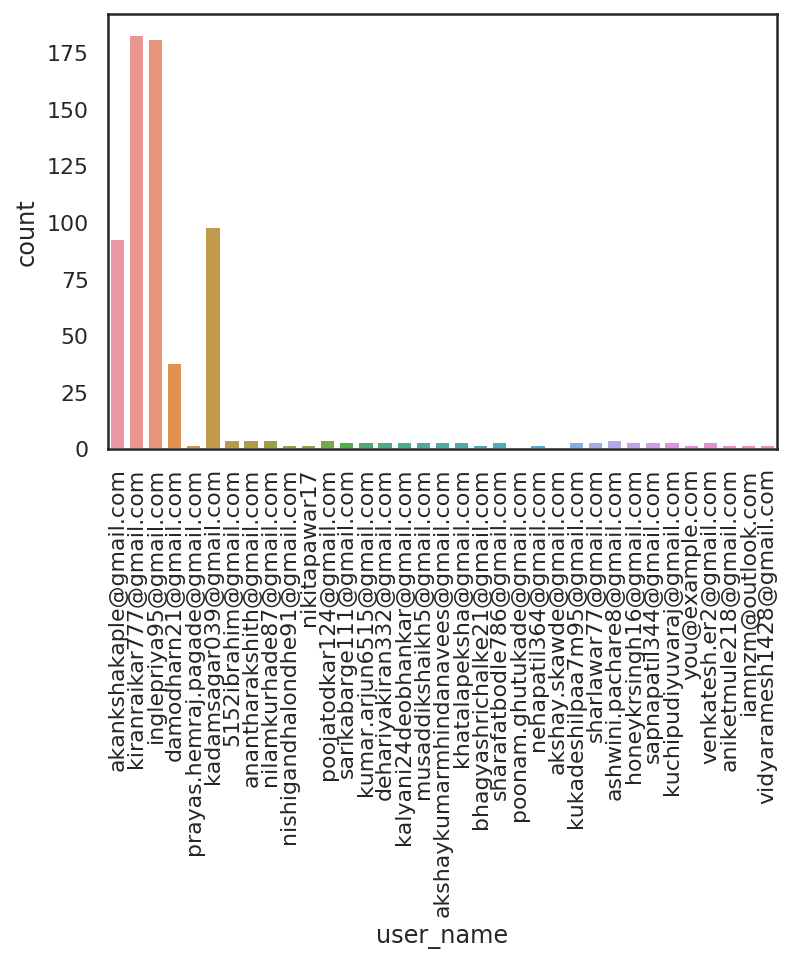

In [11]:
sb.countplot(x='user_name', data=data)
plt.xticks(rotation=90)

In [14]:
data['user_name'].value_counts()

kiranraikar777@gmail.com             183
inglepriya95@gmail.com               181
kadamsagar039@gmail.com               98
akankshakaple@gmail.com               93
damodharn21@gmail.com                 38
ashwini.pachare8@gmail.com             4
poojatodkar124@gmail.com               4
nilamkurhade87@gmail.com               4
5152ibrahim@gmail.com                  4
anantharakshith@gmail.com              4
kumar.arjun6515@gmail.com              3
sharlawar77@gmail.com                  3
khatalapeksha@gmail.com                3
sapnapatil344@gmail.com                3
kuchipudiyuvaraj@gmail.com             3
dehariyakiran332@gmail.com             3
akshaykumarmhindanavees@gmail.com      3
venkatesh.er2@gmail.com                3
honeykrsingh16@gmail.com               3
kukadeshilpaa7m95@gmail.com            3
sharafatbodle786@gmail.com             3
kalyani24deobhankar@gmail.com          3
sarikabarge111@gmail.com               3
musaddikshaikh5@gmail.com              3
nishigandhalondh